1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

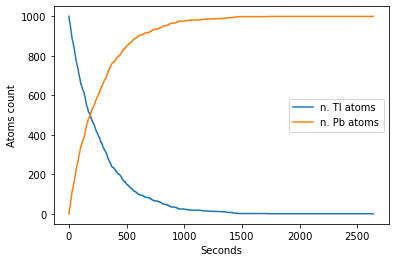

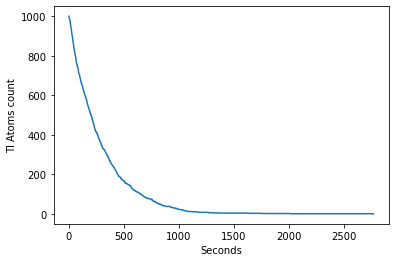

In [1]:
import numpy as np
import matplotlib.pyplot as plt

manual_seed = 1
np.random.seed(manual_seed)
tau = 3.052 * 60 
n_tl_atoms = 1000

tl_history = [n_tl_atoms]
pb_history = [0]

while tl_history[-1] > 0: 
    probs = np.random.random(tl_history[-1]) 
    p = 1 - 2**(-1 / tau)
    has_decayed = probs < p
    n_decayed = np.sum(has_decayed)
    tl_history.append(tl_history[-1] - n_decayed)
    pb_history.append(pb_history[-1] + n_decayed)

fig = plt.figure()
plt.plot(tl_history, label='n. Tl atoms')
plt.plot(pb_history, label='n. Pb atoms')
plt.xlabel('Seconds')
plt.ylabel('Atoms count')
plt.legend()
plt.show()
icdf = lambda y: -tau * np.log2(1 - y)
times_of_decay = icdf(np.random.random(n_tl_atoms))

atoms = []
done = False
step = 0 
while not done:
    n_not_decayed = np.sum(times_of_decay > step)
    atoms.append(n_not_decayed)
    if n_not_decayed == 0:
        done = True
    step += 1
    
plt.plot(atoms)
plt.xlabel('Seconds')
plt.ylabel('Tl Atoms count')
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

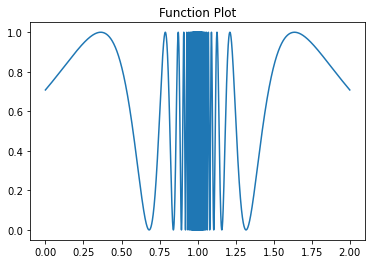

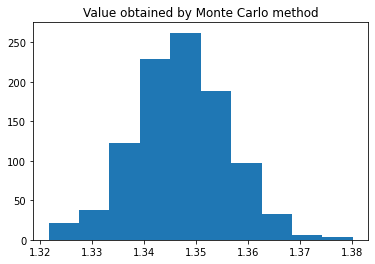

Value obtained by Monte Carlo method
Integral = 1.3470038
Error = 0.006722882858650632

Value obtained by Mean Value method
Integral = 1.3301565758319074
Error = 0.006603298403204266


In [2]:
def function(x):
    return np.power(np.sin(1/(1-x)), 2)
x = np.linspace(0, 2, 100000)
fig, ax = plt.subplots(1)
ax.plot(x, function(x))
ax.set_title('Function Plot')
plt.show()
def Monte_Carlo_integ(f):
    N = 10000
    count = 0
    for i in range(N):
        x = 2 * np.random.random() 
        y = np.random.random()     
        if y < f(x): count += 1
    I = 2 * count / N
    return I

integral = []
for i in range(1000):
    integral += [Monte_Carlo_integ(function), ]
fig, ax = plt.subplots(1)
h = ax.hist(integral)
ax.set_title('Value obtained by Monte Carlo method')
plt.show()
print('Value obtained by Monte Carlo method')
print('Integral =', np.mean(integral))
print('Error =',np.std(integral)/np.mean(integral))

def mean_value_method(a, b, N, f):
    x = np.random.random(N)
    x = (b-a)*x + a
    y = f(x)
    return ((b-a)*np.sum(y))/N, (b-a)*((np.var(y))**0.5)/(N**0.5)

(I, err) = mean_value_method(0,2,10000, function)

print('\nValue obtained by Mean Value method')
print('Integral =', I)
print('Error =', err)

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [3]:
n_sample = 100000
counter = 0   
for i in range(n_sample):
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    
    if(x**2 + y**2 <= 1):
        counter += 1   
        
integral = 4 * counter / n_sample 
print("The result in 2D: ", integral)       
          
counter = 0   
for i in range(n_sample):
    x = np.random.uniform(-1,1,10)
    r = (x**2).sum()
    
    if(r <= 1):
        counter += 1
V = 2**10
integral = V * counter / n_sample
print("The result in 10D: ", integral)

The result in 2D:  3.14772
The result in 10D:  2.63168


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [6]:
n_sample = 100000    
        
def f(x):
    return 1 / (np.sqrt(x) * (np.exp(x) + 1))        
        
def w(x):
    return 1 / np.sqrt(x)
        
x = np.random.random(n_sample)**2        
integral = 1 / n_sample * np.sum(f(x) / w(x)) * 2
print("Importance sampling method: ", integral)

Importance sampling method:  0.8394369413675493
